In [33]:
from opensoundscape import Audio, Spectrogram, CNN, BoxedAnnotations

import numpy as np
import pandas as pd
from glob import glob
from pathlib import Path

from matplotlib import pyplot as plt
def figsize(w,h):
    plt.rcParams['figure.figsize']=[w,h]
figsize(15,5) #for big visuals
%config InlineBackend.figure_format = 'retina'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import IPython
import seaborn as sns
palette = sns.color_palette("deep", 10)
plt.rcParams['font.family'] = 'Gill Sans'

import json
import seaborn as sns
import tuftelike

In [34]:
# download the annotated dataset from EDI and set the relative or absolute path here:
annotated_dataset_path = Path("../../../localization_dataset_labeled_clips/")
song_positions = pd.read_csv(
    annotated_dataset_path / "localized_events.csv",
    index_col=0,
    parse_dates=["start_timestamp"],
    
)
song_positions["date"] = song_positions["start_timestamp"].apply(
    lambda x: pd.Timestamp(x).to_pydatetime().date()
)

recorder_positions = pd.read_csv(
    annotated_dataset_path / "localization_metadata/point_table.csv", index_col=0
)


In [35]:

song_positions['position'] = song_positions['position'].astype(str).str.replace(r'\bnan\b', 'NaN', regex=True)
song_positions
# Convert the string representation to actual lists
song_positions['position'] = song_positions['position'].apply(json.loads)
positions = np.vstack(song_positions.position.values)
song_positions['Easting']=positions[:,0]
song_positions['Northing']=positions[:,1]

In [36]:
# put test arrays last for figure
test_arrays = ("SBT-6-83", "SBT-3-7", "SBT-6-76")
arrays = list(song_positions.array.unique())
arrays = [a for a in arrays if a not in test_arrays] + list(test_arrays)

/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_22415/3943232215.py:34: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_22415/3943232215.py:34: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_22415/3943232215.py:34: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(
/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_22415/3943232215.py:34: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_22415/3943232215.py:34: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(
/var/folders/d8

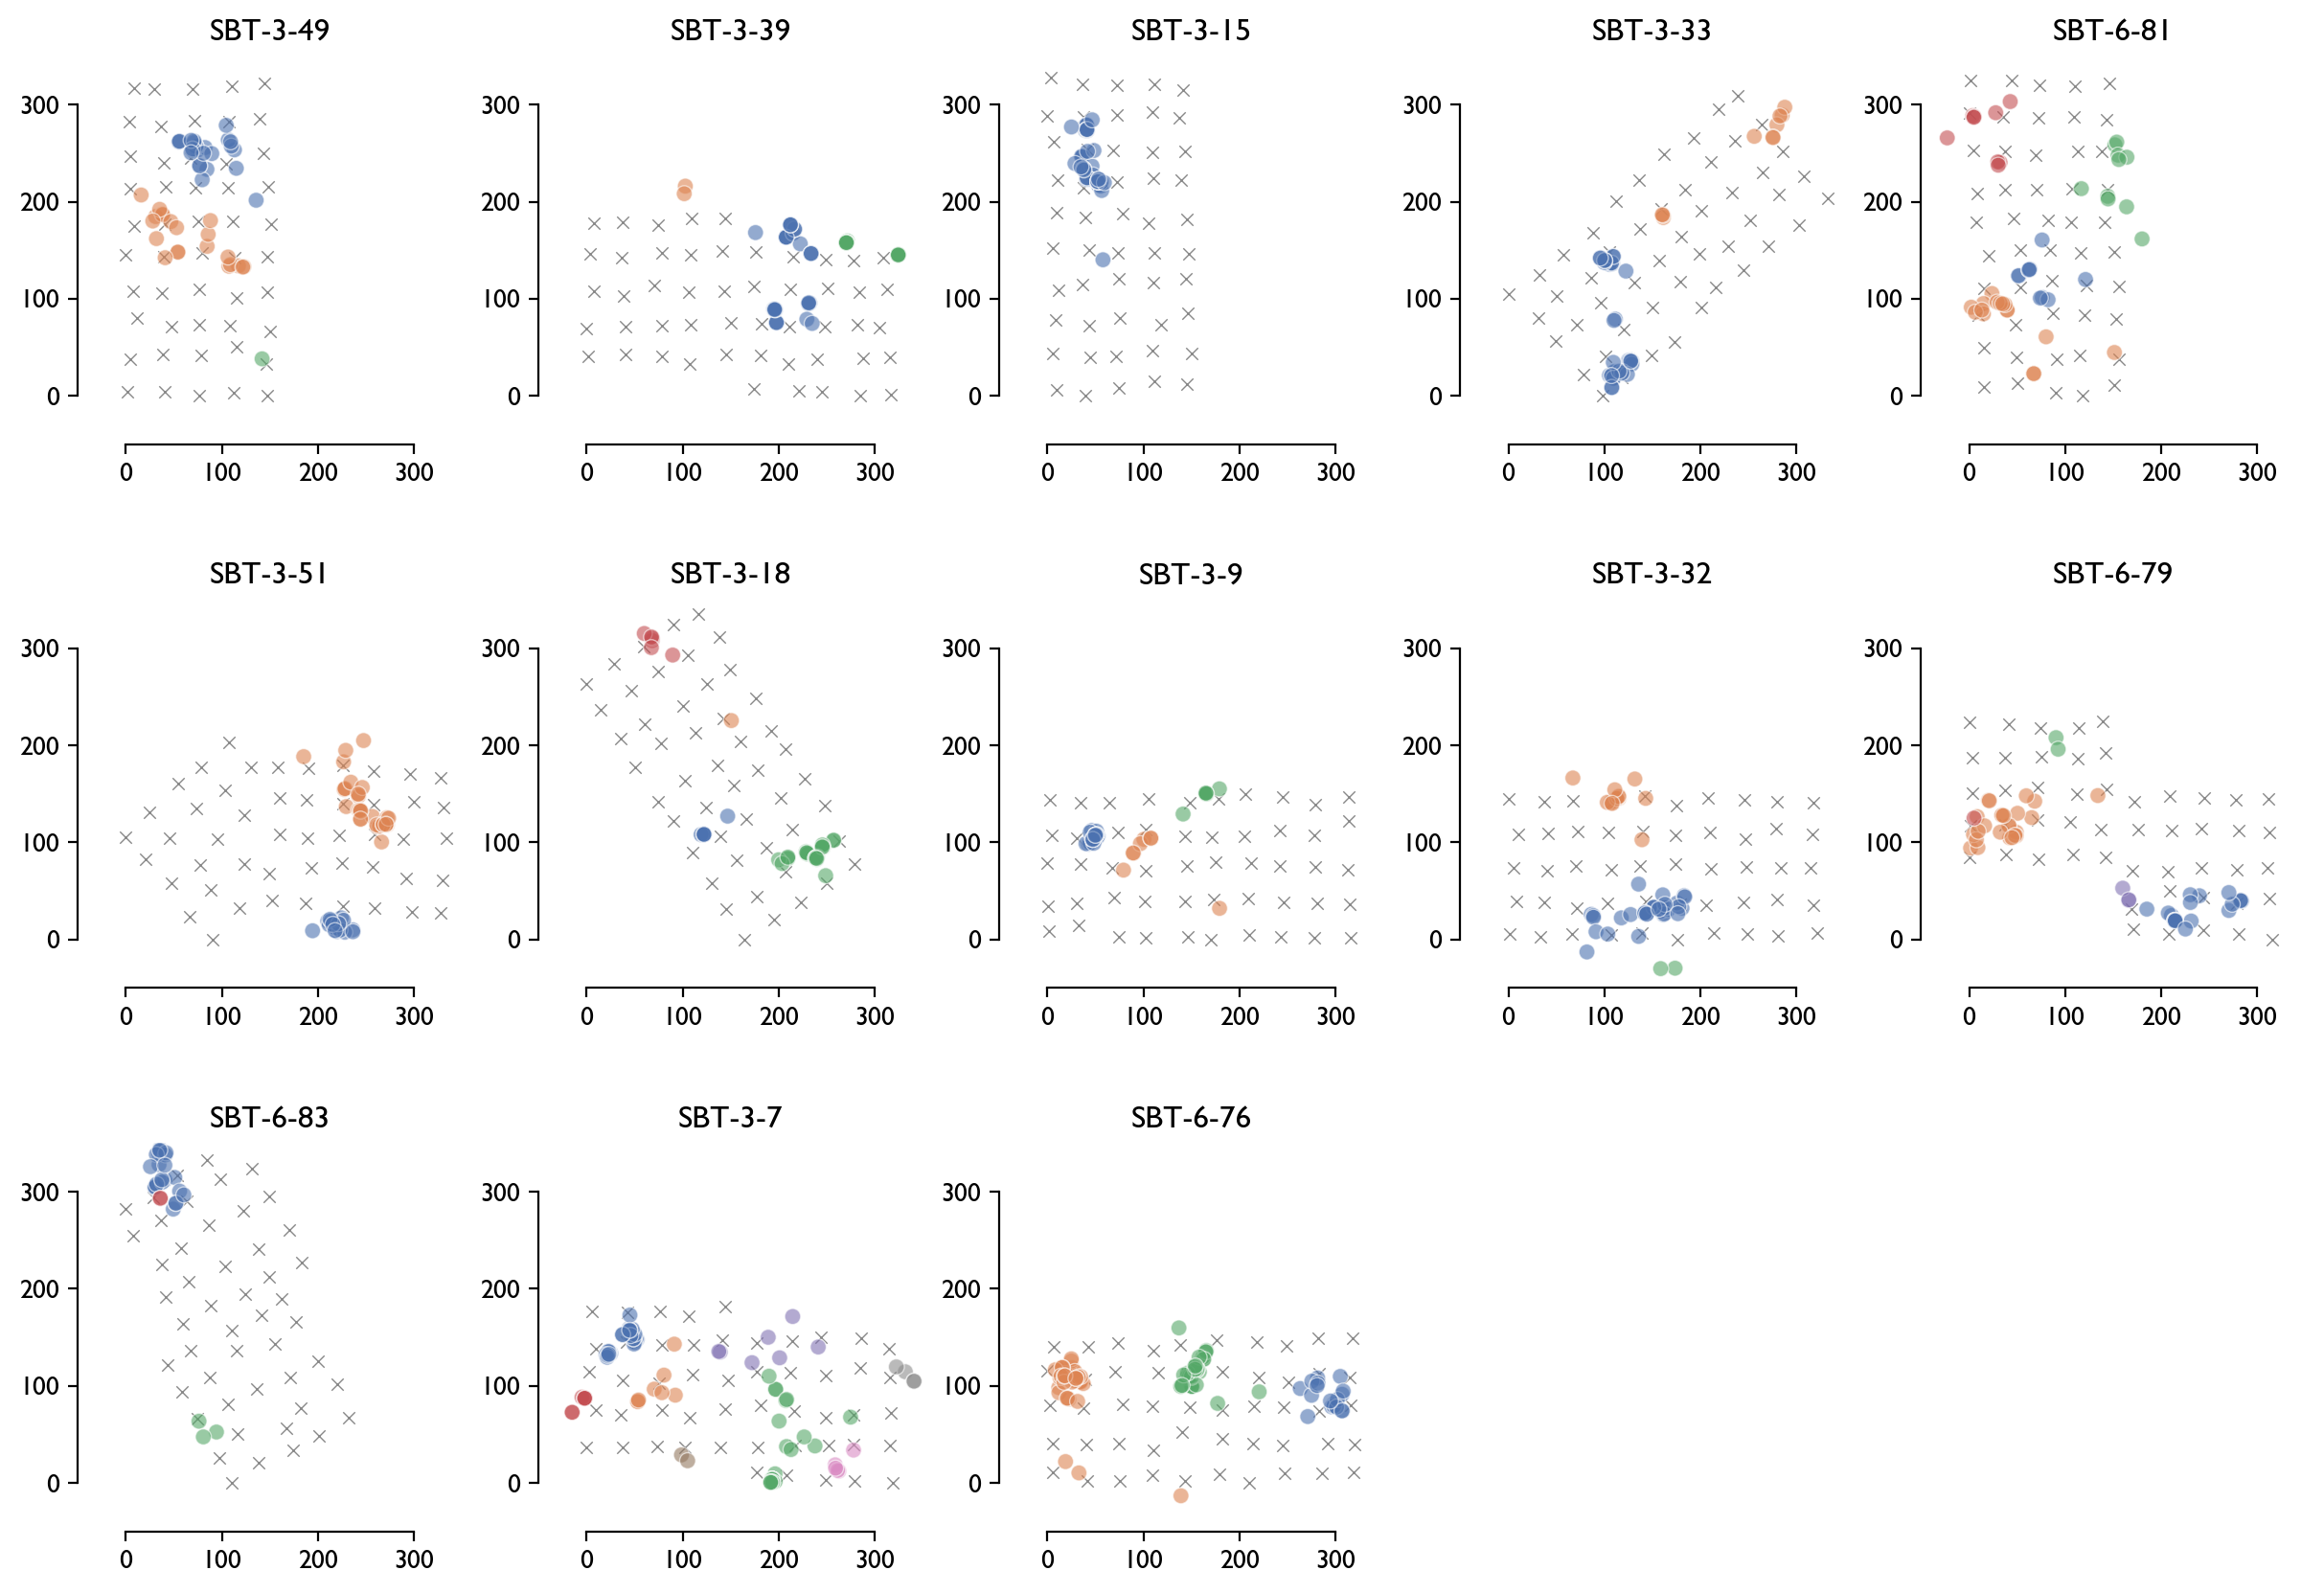

In [40]:
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
axs = axs.flatten()

plt.subplots_adjust(hspace=0.4)

for i, array in enumerate(arrays):
    array_dets = song_positions[song_positions["array"] == array].copy()
    
    ax = axs[i]

    # create relative coordinates for plotting
    array_metadata = recorder_positions[recorder_positions["array"] == array].copy()
    array_metadata["x"] = (
        array_metadata["utm_easting"] - array_metadata["utm_easting"].min()
    )
    array_metadata["y"] = (
        array_metadata["utm_northing"] - array_metadata["utm_northing"].min()
    )

    array_dets['x'] = array_dets['Easting'] - array_metadata["utm_easting"].min()
    array_dets['y'] = array_dets['Northing'] - array_metadata["utm_northing"].min()

    # plot array microphones
    ax.scatter(
        array_metadata.x,
        array_metadata.y,
        marker="x",
        s=20,
        color="#888888",
        linewidths=0.5,
    )

    # plot localized detections of Ovenbird songs, colored by individual bird label
    sns.scatterplot(
        data=array_dets,
        x="x",
        y="y",
        hue="class",
        ax=ax,
        alpha=0.6,
        palette=palette,
    )

    xmin, xmax = -50, 350
    ymin, ymax = -50, 350
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    ax.set_xticks([0, 100, 200, 300])
    ax.set_yticks([0, 100, 200, 300])

    tuftelike._remove_chart_junk([0, 300], [0, 300], ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.legend().remove()
    ax.set_title(array)

if len(axs) > len(song_positions.array.unique()):
    for ax in axs[len(song_positions.array.unique()) :]:
        ax.axis("off")
plt.savefig("../../figures/Figure3_localized_oven_with_labels.pdf")